<a href="https://colab.research.google.com/github/karielson/Trabalho_CLASSIFICACAO_SUPERVISIONADA/blob/main/Classifica%C3%A7%C3%A3o_Supervisionada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
from scipy.stats import multivariate_normal

In [ ]:
# Configurações gerais de visualização
plt.style.use('ggplot')
%matplotlib inline

# Função auxiliar para plotar regiões de decisão
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [ ]:
# 1. Gerando Dados Sintéticos
# Criando dados sintéticos para três classes
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           n_classes=3, n_clusters_per_class=1, random_state=42)



In [ ]:
# Dividindo dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

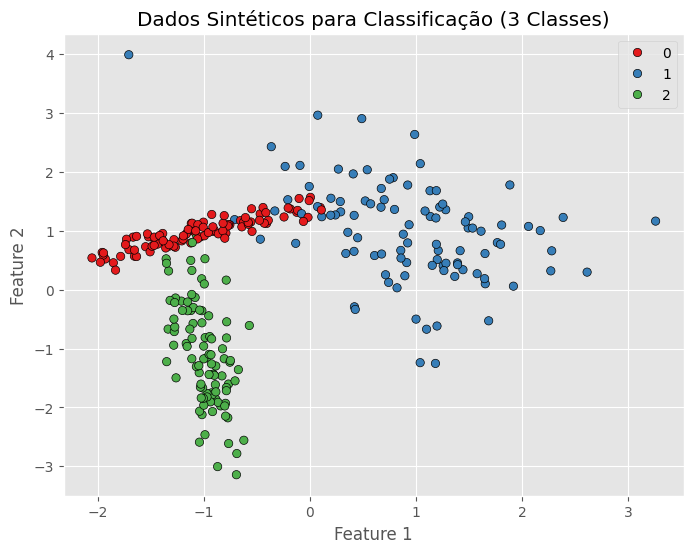

In [ ]:
# Visualizando os dados (sem normalização para manter a originalidade dos gráficos)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='Set1', edgecolor='k')
plt.title('Dados Sintéticos para Classificação (3 Classes)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

KNN Accuracy: 0.9333333333333333
KNN F1 Score: 0.9336103344724035
KNN Confusion Matrix:


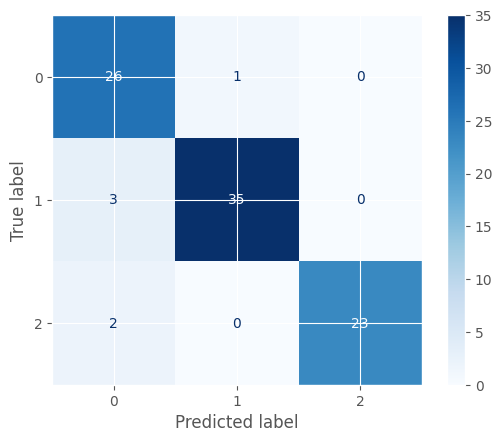

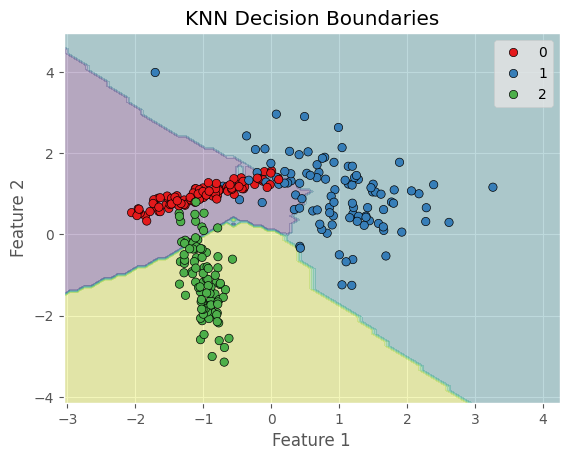

In [ ]:

# Implementação do KNN
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Avaliação do KNN
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN F1 Score:", f1_score(y_test, y_pred_knn, average='macro'))
print("KNN Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, cmap=plt.cm.Blues)
plt.show()

# Plotando regiões de decisão do KNN
plot_decision_boundaries(X, y, knn, "KNN Decision Boundaries")


Naive Bayes Accuracy: 0.9222222222222223
Naive Bayes F1 Score: 0.9202438720915764
Bayesian Classifier Confusion Matrix:


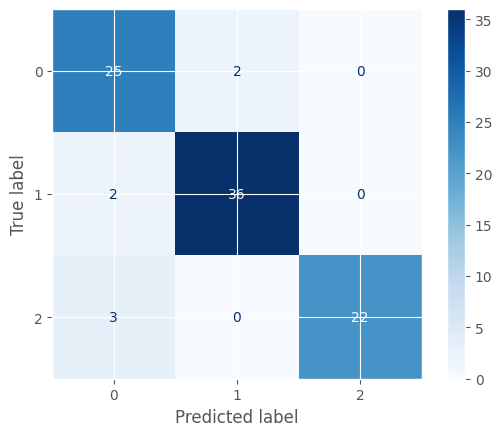

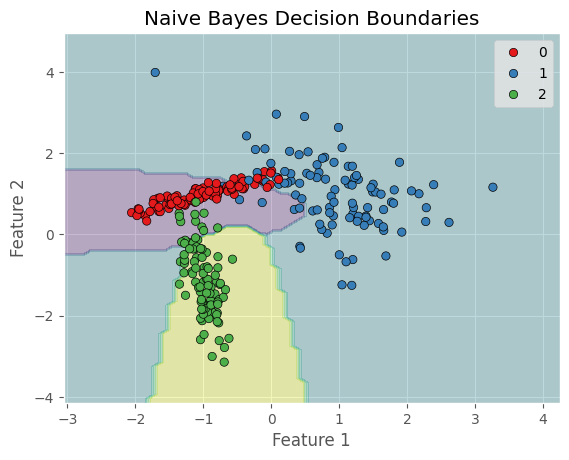

In [ ]:
# Implementação do Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Avaliação do Naive Bayes
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes F1 Score:", f1_score(y_test, y_pred_nb, average='macro'))
print("Bayesian Classifier Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb, cmap=plt.cm.Blues)
plt.show()
# Plotando regiões de decisão do Naive Bayes
plot_decision_boundaries(X, y, nb, "Naive Bayes Decision Boundaries")


Bayesian Classifier Accuracy: 0.9666666666666667
Bayesian Classifier F1 Score: 0.966644410253433
Bayesian Classifier Confusion Matrix:


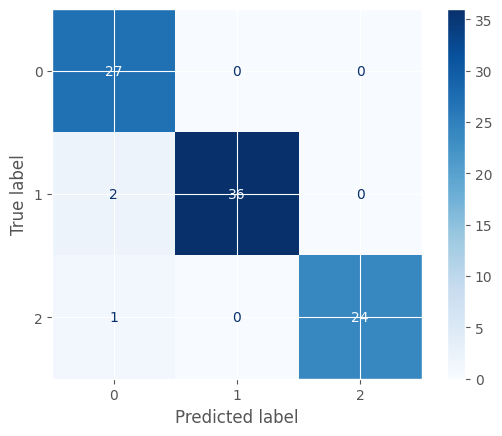

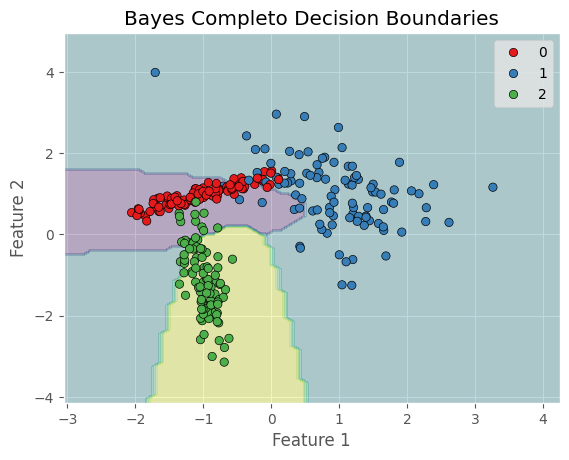

In [ ]:
# Implementação do Classificador Bayes Completo
class BayesianClassifier:
    def __init__(self):
        self.means = {}
        self.covariances = {}
        self.priors = {}

    def fit(self, X, y):
        classes = np.unique(y)
        for cls in classes:
            X_cls = X[y == cls]
            self.means[cls] = X_cls.mean(axis=0)
            self.covariances[cls] = np.cov(X_cls, rowvar=False)
            self.priors[cls] = len(X_cls) / len(X)

    def predict(self, X):
        predictions = []
        for x in X:
            class_probs = {}
            for cls in self.means:
                mean = self.means[cls]
                cov = self.covariances[cls]
                prior = self.priors[cls]
                likelihood = multivariate_normal.pdf(x, mean=mean, cov=cov)
                class_probs[cls] = prior * likelihood
            predictions.append(max(class_probs, key=class_probs.get))
        return np.array(predictions)

# Treinando e testando o Classificador Bayes Completo
bayes_complete = BayesianClassifier()
bayes_complete.fit(X_train, y_train)
y_pred_bayes = bayes_complete.predict(X_test)

# Avaliação do Classificador Bayes Completo
print("Bayesian Classifier Accuracy:", accuracy_score(y_test, y_pred_bayes))
print("Bayesian Classifier F1 Score:", f1_score(y_test, y_pred_bayes, average='macro'))
print("Bayesian Classifier Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_bayes, cmap=plt.cm.Blues)
plt.show()

# Plotando regiões de decisão do Naive Bayes
plot_decision_boundaries(X, y, nb, "Bayes Completo Decision Boundaries")

Decision Tree Accuracy: 0.9444444444444444
Decision Tree F1 Score: 0.9459394948116753
Decision Tree Confusion Matrix:


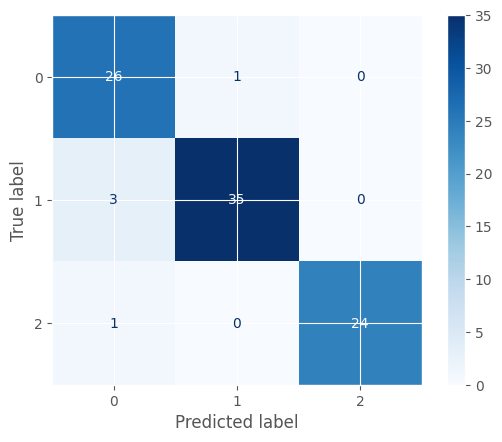

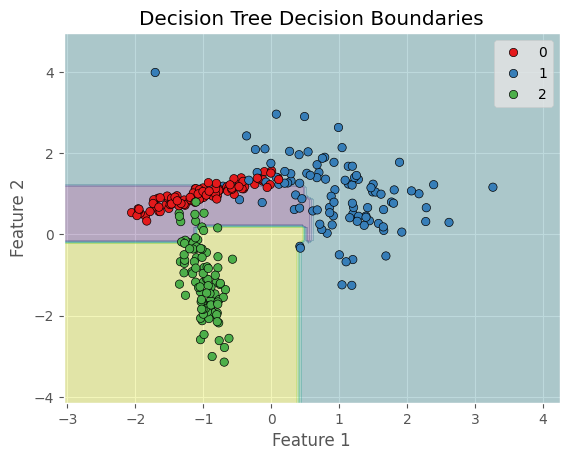

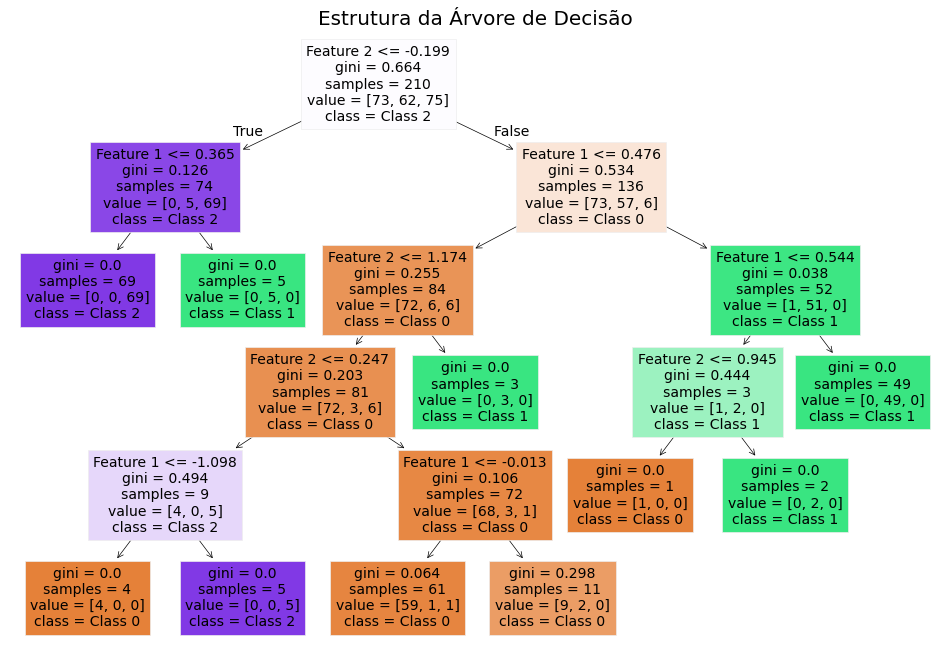

In [ ]:
# Implementação da Árvore de Decisão
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

# Avaliação da Árvore de Decisão
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Decision Tree F1 Score:", f1_score(y_test, y_pred_tree, average='macro'))
print("Decision Tree Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, cmap=plt.cm.Blues)
plt.show()

# Plotando regiões de decisão da Árvore de Decisão
plot_decision_boundaries(X, y, tree, "Decision Tree Decision Boundaries")

# Visualizando a estrutura da Árvore de Decisão
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=["Feature 1", "Feature 2"],
          class_names=["Class 0", "Class 1", "Class 2"])
plt.title("Estrutura da Árvore de Decisão")
plt.show()


In [ ]:
# Importando o StandardScaler para normalização dos dados
from sklearn.preprocessing import StandardScaler

# Carregando a base de dados Wine
wine = load_wine()
X_wine = wine.data
y_wine = wine.target

# Dividindo dados em treino e teste
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)

# Normalizando os dados
scaler = StandardScaler()
X_train_wine = scaler.fit_transform(X_train_wine)
X_test_wine = scaler.transform(X_test_wine)

# Testando o KNN na base de dados Wine
knn_wine = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_wine.fit(X_train_wine, y_train_wine)
y_pred_knn_wine = knn_wine.predict(X_test_wine)

print("Wine Dataset - KNN Accuracy:", accuracy_score(y_test_wine, y_pred_knn_wine))
print("Wine Dataset - KNN F1 Score:", f1_score(y_test_wine, y_pred_knn_wine, average='macro'))

# Testando o Naive Bayes na base de dados Wine
nb_wine = GaussianNB()
nb_wine.fit(X_train_wine, y_train_wine)
y_pred_nb_wine = nb_wine.predict(X_test_wine)

print("Wine Dataset - Naive Bayes Accuracy:", accuracy_score(y_test_wine, y_pred_nb_wine))
print("Wine Dataset - Naive Bayes F1 Score:", f1_score(y_test_wine, y_pred_nb_wine, average='macro'))

# Testando a Árvore de Decisão na base de dados Wine
tree_wine = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_wine.fit(X_train_wine, y_train_wine)
y_pred_tree_wine = tree_wine.predict(X_test_wine)

print("Wine Dataset - Decision Tree Accuracy:", accuracy_score(y_test_wine, y_pred_tree_wine))
print("Wine Dataset - Decision Tree F1 Score:", f1_score(y_test_wine, y_pred_tree_wine, average='macro'))


Wine Dataset - KNN Accuracy: 0.9629629629629629
Wine Dataset - KNN F1 Score: 0.9632920719127616
Wine Dataset - Naive Bayes Accuracy: 1.0
Wine Dataset - Naive Bayes F1 Score: 1.0
Wine Dataset - Decision Tree Accuracy: 0.9629629629629629
Wine Dataset - Decision Tree F1 Score: 0.9623585233540353


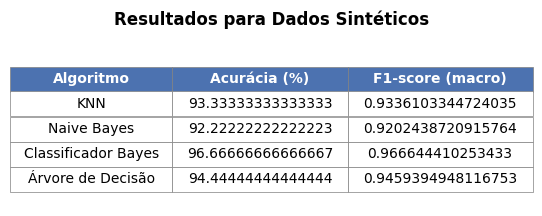

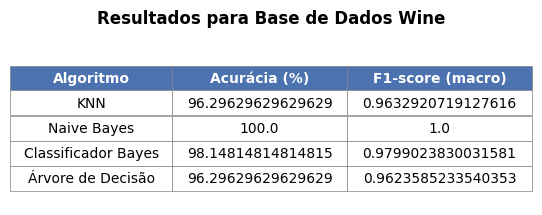

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Função para calcular métricas e armazenar em um DataFrame
def evaluate_models(X_train, X_test, y_train, y_test):
    results = []

    # KNN
    knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    results.append({
        "Algoritmo": "KNN",
        "Acurácia (%)": accuracy_score(y_test, y_pred_knn) * 100,
        "F1-score (macro)": f1_score(y_test, y_pred_knn, average='macro')
    })

    # Naive Bayes
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred_nb = nb.predict(X_test)
    results.append({
        "Algoritmo": "Naive Bayes",
        "Acurácia (%)": accuracy_score(y_test, y_pred_nb) * 100,
        "F1-score (macro)": f1_score(y_test, y_pred_nb, average='macro')
    })

    # Classificador Bayes Completo
    bayes_complete = BayesianClassifier()
    bayes_complete.fit(X_train, y_train)
    y_pred_bayes = bayes_complete.predict(X_test)
    results.append({
        "Algoritmo": "Classificador Bayes",
        "Acurácia (%)": accuracy_score(y_test, y_pred_bayes) * 100,
        "F1-score (macro)": f1_score(y_test, y_pred_bayes, average='macro')
    })

    # Árvore de Decisão
    tree = DecisionTreeClassifier(max_depth=5, random_state=42)
    tree.fit(X_train, y_train)
    y_pred_tree = tree.predict(X_test)
    results.append({
        "Algoritmo": "Árvore de Decisão",
        "Acurácia (%)": accuracy_score(y_test, y_pred_tree) * 100,
        "F1-score (macro)": f1_score(y_test, y_pred_tree, average='macro')
    })

    # Convertendo resultados em DataFrame
    df_results = pd.DataFrame(results)
    return df_results

# Função para exibir a tabela de resultados como uma figura acadêmica
def plot_table(df, title):
    fig, ax = plt.subplots(figsize=(6, 2))  # Ajuste o tamanho conforme necessário
    ax.axis('off')  # Remove os eixos

    # Cria a tabela
    table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center', colColours=["#4C72B0"] * df.shape[1])
    table.auto_set_font_size(False)
    table.set_fontsize(10)

    # Ajusta a largura das colunas
    for i in range(df.shape[1]):
        table.auto_set_column_width(i)

    # Formatação da tabela
    table.scale(1, 1.5)  # Ajusta a escala da tabela
    ax.set_title(title, fontweight="bold", fontsize=12, pad=20)

    # Destaca o cabeçalho
    for (i, j), cell in table.get_celld().items():
        if i == 0:
            cell.set_text_props(weight='bold', color='white')
            cell.set_facecolor('#4C72B0')  # Cor de fundo do cabeçalho
        cell.set_edgecolor('grey')  # Cor das bordas

    plt.show()

# Avaliando nos dados sintéticos
df_sinteticos = evaluate_models(X_train, X_test, y_train, y_test)
plot_table(df_sinteticos, "Resultados para Dados Sintéticos")

# Carregando e normalizando a base de dados Wine
wine = load_wine()
X_wine = wine.data
y_wine = wine.target
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)
X_train_wine = scaler.fit_transform(X_train_wine)
X_test_wine = scaler.transform(X_test_wine)

# Avaliando na base de dados Wine
df_wine = evaluate_models(X_train_wine, X_test_wine, y_train_wine, y_test_wine)
plot_table(df_wine, "Resultados para Base de Dados Wine")
